In [1]:
%%capture
!pip install langdetect

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # make detection deterministic

## Reddit Data

In [3]:
reddit_df = pd.read_csv('../data/reddit_crypto_data.csv')
reddit_df

,id,title,text,score,created_utc,author,num_comments,subreddit,permalink,type,platform,sentiment,parent_id
0,n7rl2y,You hear about the kid who put in $500 into a ...,You hear about the kid who put in $500 into a ...,53912,2021-05-08 23:28:35,jonbristow,4452.0,CryptoCurrency,https://reddit.com/r/CryptoCurrency/comments/n...,submission,general,negative,NaN
1,gxfsm80,NaN,My buddy (who's a successful business person w...,642,2021-05-09 07:10:28,DopeMeme_Deficiency,NaN,CryptoCurrency,https://reddit.com/r/CryptoCurrency/comments/n...,comment,general,positive,t3_n7rl2y
2,gxeifve,NaN,You also don’t hear about me turning my $20 in...,17076,2021-05-09 00:43:56,louisgrc11,NaN,CryptoCurrency,https://reddit.com/r/CryptoCurrency/comments/n...,comment,general,neutral,t3_n7rl2y
3,gxea1f7,NaN,Survivorship bias is real and it's everywhere,1472,2021-05-08 23:35:03,cremebruleejuulpod,NaN,CryptoCurrency,https://reddit.com/r/CryptoCurrency/comments/n...,comment,general,positive,t3_n7rl2y
4,gxefbuj,NaN,I'm one of those guys who fomo'd in 2017 and e...,678,2021-05-09 00:18:13,foreignGER,NaN,CryptoCurrency,https://reddit.com/r/CryptoCurrency/comments/n...,comment,general,positive,t3_n7rl2y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188585,hiwxffp,NaN,If anyone wondering why u\\tryM3B1tch called m...,0,2021-11-02 02:39:27,WarrenMuppet007,NaN,Ethereum,https://reddit.com/r/ethereum/comments/qkaa7r/...,comment,general,positive,t1_hiwvs8g
188586,hiyu47e,NaN,Check out Hop Protocol. You can bridge between...,2,2021-11-02 10:54:22,None,NaN,Ethereum,https://reddit.com/r/ethereum/comments/qkaa7r/...,comment,general,positive,t1_hixsz9x
188587,hiz5rau,NaN,"i read through their white paper, and while it...",2,2021-11-02 12:43:46,3umel,NaN,Ethereum,https://reddit.com/r/ethereum/comments/qkaa7r/...,comment,general,positive,t1_hiyu47e
188588,hiwy2gy,NaN,"Lol, you tried to dig up my post history to in...",1,2021-11-02 02:43:46,WarrenMuppet007,NaN,Ethereum,https://reddit.com/r/ethereum/comments/qkaa7r/...,comment,general,positive,t1_hiwxqro


In [4]:
# Lets see the unique values in the column 'type'
print(reddit_df['type'].unique())

['submission' 'comment']


In [5]:
# Filter if necessary, on second thought I think its good to keep submissions.
# Submissions are generally more insightful with more information.
# df = df[df['type'] == 'comment']

# Next lets drop unnecessary columns
reddit_df = reddit_df.drop(columns=['id', 'title', 'author', 'num_comments', 'permalink', 'type', 'parent_id'])

# Drop rows with missing text of sentiment values
reddit_df = reddit_df.dropna(subset=['text', 'sentiment'])

# Drop duplicates
reddit_df = reddit_df.drop_duplicates()
reddit_df

,text,score,created_utc,subreddit,platform,sentiment
0,You hear about the kid who put in $500 into a ...,53912,2021-05-08 23:28:35,CryptoCurrency,general,negative
1,My buddy (who's a successful business person w...,642,2021-05-09 07:10:28,CryptoCurrency,general,positive
2,You also don’t hear about me turning my $20 in...,17076,2021-05-09 00:43:56,CryptoCurrency,general,neutral
3,Survivorship bias is real and it's everywhere,1472,2021-05-08 23:35:03,CryptoCurrency,general,positive
4,I'm one of those guys who fomo'd in 2017 and e...,678,2021-05-09 00:18:13,CryptoCurrency,general,positive
...,...,...,...,...,...,...
188585,If anyone wondering why u\\tryM3B1tch called m...,0,2021-11-02 02:39:27,Ethereum,general,positive
188586,Check out Hop Protocol. You can bridge between...,2,2021-11-02 10:54:22,Ethereum,general,positive
188587,"i read through their white paper, and while it...",2,2021-11-02 12:43:46,Ethereum,general,positive
188588,"Lol, you tried to dig up my post history to in...",1,2021-11-02 02:43:46,Ethereum,general,positive


In [6]:
# Datetime handling
reddit_df['created_utc'] = pd.to_datetime(reddit_df['created_utc']).dt.date
reddit_df

,text,score,created_utc,subreddit,platform,sentiment
0,You hear about the kid who put in $500 into a ...,53912,2021-05-08,CryptoCurrency,general,negative
1,My buddy (who's a successful business person w...,642,2021-05-09,CryptoCurrency,general,positive
2,You also don’t hear about me turning my $20 in...,17076,2021-05-09,CryptoCurrency,general,neutral
3,Survivorship bias is real and it's everywhere,1472,2021-05-08,CryptoCurrency,general,positive
4,I'm one of those guys who fomo'd in 2017 and e...,678,2021-05-09,CryptoCurrency,general,positive
...,...,...,...,...,...,...
188585,If anyone wondering why u\\tryM3B1tch called m...,0,2021-11-02,Ethereum,general,positive
188586,Check out Hop Protocol. You can bridge between...,2,2021-11-02,Ethereum,general,positive
188587,"i read through their white paper, and while it...",2,2021-11-02,Ethereum,general,positive
188588,"Lol, you tried to dig up my post history to in...",1,2021-11-02,Ethereum,general,positive


## App Store Data

In [7]:
appstore_df = pd.read_csv('../data/app_crypto_data.csv')
appstore_df

,exchange,platform,user,rating,date,text,sentiment
0,binance,ios,James4all,5,2023-10-04 08:23:28,How can someone set stop lose and take profit ...,negative
1,binance,ios,Zionsb,1,2023-05-24 00:13:10,"I have been using Binance for a little bit, ev...",positive
2,binance,ios,Username: Courtney,2,2021-04-11 18:25:51,The only thing good about the app is it’s inte...,positive
3,binance,ios,joshdammit,1,2023-06-15 10:57:52,Got an email last week saying binance is shutt...,positive
4,binance,ios,King Banks M,1,2021-05-05 17:13:25,I’ve been trying to buy crypto for a while now...,positive
...,...,...,...,...,...,...,...
1724,bybit,android,Ahsan Ali,5,2025-03-03 17:27:34,Never seen such a fast and reliable exchange w...,positive
1725,bybit,android,Bala M Sarki,3,2025-03-03 17:13:58,Why is it that opay payment reduce our money,neutral
1726,bybit,android,Jesu Ponippase,5,2025-03-03 17:13:10,Supper easy trading platform,positive
1727,bybit,android,Susan Metalor,5,2025-03-03 16:04:41,Great platform.,positive


In [8]:
# Drop unnecessary columns
appstore_df = appstore_df.drop(columns=['user'])

# Drop rows with missing text or sentiment values
appstore_df = appstore_df.dropna(subset=['text', 'sentiment'])

# Drop rows with text length <20
appstore_df = appstore_df[appstore_df['text'].str.split().str.len() >= 20]

In [9]:
# Datetime handling
appstore_df['date'] = pd.to_datetime(appstore_df['date']).dt.date
appstore_df

,exchange,platform,rating,date,text,sentiment
0,binance,ios,5,2023-10-04,How can someone set stop lose and take profit ...,negative
1,binance,ios,1,2023-05-24,"I have been using Binance for a little bit, ev...",positive
2,binance,ios,2,2021-04-11,The only thing good about the app is it’s inte...,positive
3,binance,ios,1,2023-06-15,Got an email last week saying binance is shutt...,positive
4,binance,ios,1,2021-05-05,I’ve been trying to buy crypto for a while now...,positive
...,...,...,...,...,...,...
1709,bybit,android,1,2025-03-04,"Bybit lacks many things, fast support customer...",positive
1712,bybit,android,4,2025-03-04,"I liked the app, it's really amazing, there's ...",positive
1714,bybit,android,3,2025-03-04,Bybit is a game changer in the world of crypto...,positive
1715,bybit,android,3,2025-03-04,"Not too good, not too bad, try to make it more...",positive


## TrustPilot Reviews Data

In [10]:
tpilot_df = pd.read_csv('../data/trustpilot_crypto_data.csv')
tpilot_df

,Exchange,Username,Date,Review,Rating,Sentiment
0,binance,Akm LvL,"March 20, 2025",your account with your balance will disappear ...,1,neutral
1,binance,Rubeek,"March 20, 2025",It should improve for retailers instead of jus...,3,neutral
2,binance,Sophia,"March 21, 2025",I have been using this platform for few years ...,3,positive
3,binance,jaco antony,"March 01, 2025",man i had headache to withdrawl,3,neutral
4,binance,John Haines,"January 01, 2025","Getting money in is easy, but out is ridiculou...",1,positive
...,...,...,...,...,...,...
12008,bybit,Jckscott,"May 21, 2022",I loved my time trading on this website everyt...,5,positive
12009,bybit,Luca,"October 13, 2022",I've Lost more than 900$ for a long order clos...,1,positive
12010,bybit,GAME CHANGER,"October 11, 2022",Scam exchange has scammed me 114$ on p2p and n...,1,neutral
12011,bybit,Mircea,"August 24, 2022",My money were lost via P2P transaction.The sel...,1,negative


In [11]:
# Drop unnecessary columns
tpilot_df = tpilot_df.drop(columns=['Username'])

# Drop rows with missing review or sentiment values
tpilot_df = tpilot_df.dropna(subset=['Review', 'Sentiment'])

# Drop rows where the review has <20 words
tpilot_df = tpilot_df[tpilot_df['Review'].str.split().str.len() >= 20]
tpilot_df

,Exchange,Date,Review,Rating,Sentiment
2,binance,"March 21, 2025",I have been using this platform for few years ...,3,positive
4,binance,"January 01, 2025","Getting money in is easy, but out is ridiculou...",1,positive
5,binance,"March 20, 2025",Account disappeared. Circular nightmare trying...,1,negative
6,binance,"March 19, 2025",Do not recommend to anybody!They got celphone ...,1,negative
8,binance,"March 24, 2024",There are those people they can't make single ...,5,negative
...,...,...,...,...,...
12007,bybit,"October 21, 2022","hello, my bybit account is restricted or banne...",1,positive
12008,bybit,"May 21, 2022",I loved my time trading on this website everyt...,5,positive
12009,bybit,"October 13, 2022",I've Lost more than 900$ for a long order clos...,1,positive
12010,bybit,"October 11, 2022",Scam exchange has scammed me 114$ on p2p and n...,1,neutral


In [12]:
# Datetime handling
tpilot_df['Date'] = pd.to_datetime(tpilot_df['Date']).dt.date
tpilot_df

,Exchange,Date,Review,Rating,Sentiment
2,binance,2025-03-21,I have been using this platform for few years ...,3,positive
4,binance,2025-01-01,"Getting money in is easy, but out is ridiculou...",1,positive
5,binance,2025-03-20,Account disappeared. Circular nightmare trying...,1,negative
6,binance,2025-03-19,Do not recommend to anybody!They got celphone ...,1,negative
8,binance,2024-03-24,There are those people they can't make single ...,5,negative
...,...,...,...,...,...
12007,bybit,2022-10-21,"hello, my bybit account is restricted or banne...",1,positive
12008,bybit,2022-05-21,I loved my time trading on this website everyt...,5,positive
12009,bybit,2022-10-13,I've Lost more than 900$ for a long order clos...,1,positive
12010,bybit,2022-10-11,Scam exchange has scammed me 114$ on p2p and n...,1,neutral


In [13]:
# It has been verified that all is in English, when crawling I forgot to only accept data if its in English. But all data is in English.
'''
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  # in case of empty or corrupt input

# Apply to the DataFrame
tpilot_df = tpilot_df[tpilot_df['Review'].apply(is_english)]
tpilot_df
'''

,Exchange,Date,Review,Rating,Sentiment
2,binance,2025-03-21,I have been using this platform for few years ...,3,positive
4,binance,2025-01-01,"Getting money in is easy, but out is ridiculou...",1,positive
5,binance,2025-03-20,Account disappeared. Circular nightmare trying...,1,negative
6,binance,2025-03-19,Do not recommend to anybody!They got celphone ...,1,negative
8,binance,2024-03-24,There are those people they can't make single ...,5,negative
...,...,...,...,...,...
12007,bybit,2022-10-21,"hello, my bybit account is restricted or banne...",1,positive
12008,bybit,2022-05-21,I loved my time trading on this website everyt...,5,positive
12009,bybit,2022-10-13,I've Lost more than 900$ for a long order clos...,1,positive
12010,bybit,2022-10-11,Scam exchange has scammed me 114$ on p2p and n...,1,neutral


## Aggregation

In [14]:
reddit_df['subreddit'] = 'r/' + reddit_df['subreddit'].astype(str)
reddit_df = reddit_df.rename(columns={
    'created_utc': 'Date',
    'subreddit': 'Source', # subreddit name
    'platform': 'Exchange',  # exchange or 'general'
    'text': 'Text',
    'score': 'Reddit Score',
    'sentiment': 'Sentiment'
})
reddit_df['Platform'] = 'web'
reddit_df['Rating'] = None
reddit_df

,Text,Reddit Score,Date,Source,Exchange,Sentiment,Platform,Rating
0,You hear about the kid who put in $500 into a ...,53912,2021-05-08,r/CryptoCurrency,general,negative,web,None
1,My buddy (who's a successful business person w...,642,2021-05-09,r/CryptoCurrency,general,positive,web,None
2,You also don’t hear about me turning my $20 in...,17076,2021-05-09,r/CryptoCurrency,general,neutral,web,None
3,Survivorship bias is real and it's everywhere,1472,2021-05-08,r/CryptoCurrency,general,positive,web,None
4,I'm one of those guys who fomo'd in 2017 and e...,678,2021-05-09,r/CryptoCurrency,general,positive,web,None
...,...,...,...,...,...,...,...,...
188585,If anyone wondering why u\\tryM3B1tch called m...,0,2021-11-02,r/Ethereum,general,positive,web,None
188586,Check out Hop Protocol. You can bridge between...,2,2021-11-02,r/Ethereum,general,positive,web,None
188587,"i read through their white paper, and while it...",2,2021-11-02,r/Ethereum,general,positive,web,None
188588,"Lol, you tried to dig up my post history to in...",1,2021-11-02,r/Ethereum,general,positive,web,None


In [15]:
appstore_df = appstore_df.rename(columns={
    'exchange': 'Exchange',
    'platform': 'Platform',  # already okay
    'rating': 'Rating',
    'date': 'Date',
    'text': 'Text',
    'sentiment': 'Sentiment'
})
appstore_df['Source'] = appstore_df['Platform'].apply(
    lambda x: 'app store' if x == 'ios' else 'play store'
)
appstore_df['Reddit Score'] = None
appstore_df

,Exchange,Platform,Rating,Date,Text,Sentiment,Source,Reddit Score
0,binance,ios,5,2023-10-04,How can someone set stop lose and take profit ...,negative,app store,None
1,binance,ios,1,2023-05-24,"I have been using Binance for a little bit, ev...",positive,app store,None
2,binance,ios,2,2021-04-11,The only thing good about the app is it’s inte...,positive,app store,None
3,binance,ios,1,2023-06-15,Got an email last week saying binance is shutt...,positive,app store,None
4,binance,ios,1,2021-05-05,I’ve been trying to buy crypto for a while now...,positive,app store,None
...,...,...,...,...,...,...,...,...
1709,bybit,android,1,2025-03-04,"Bybit lacks many things, fast support customer...",positive,play store,None
1712,bybit,android,4,2025-03-04,"I liked the app, it's really amazing, there's ...",positive,play store,None
1714,bybit,android,3,2025-03-04,Bybit is a game changer in the world of crypto...,positive,play store,None
1715,bybit,android,3,2025-03-04,"Not too good, not too bad, try to make it more...",positive,play store,None


In [16]:
tpilot_df = tpilot_df.rename(columns={
    'Review': 'Text',
})
tpilot_df['Platform'] = 'web'
tpilot_df['Source'] = 'trustpilot'
tpilot_df['Reddit Score'] = None
tpilot_df

,Exchange,Date,Text,Rating,Sentiment,Platform,Source,Reddit Score
2,binance,2025-03-21,I have been using this platform for few years ...,3,positive,web,trustpilot,None
4,binance,2025-01-01,"Getting money in is easy, but out is ridiculou...",1,positive,web,trustpilot,None
5,binance,2025-03-20,Account disappeared. Circular nightmare trying...,1,negative,web,trustpilot,None
6,binance,2025-03-19,Do not recommend to anybody!They got celphone ...,1,negative,web,trustpilot,None
8,binance,2024-03-24,There are those people they can't make single ...,5,negative,web,trustpilot,None
...,...,...,...,...,...,...,...,...
12007,bybit,2022-10-21,"hello, my bybit account is restricted or banne...",1,positive,web,trustpilot,None
12008,bybit,2022-05-21,I loved my time trading on this website everyt...,5,positive,web,trustpilot,None
12009,bybit,2022-10-13,I've Lost more than 900$ for a long order clos...,1,positive,web,trustpilot,None
12010,bybit,2022-10-11,Scam exchange has scammed me 114$ on p2p and n...,1,neutral,web,trustpilot,None


In [17]:
combined_df = pd.concat([reddit_df, appstore_df, tpilot_df], ignore_index=True)
combined_df = combined_df.drop_duplicates()
combined_df

,Text,Reddit Score,Date,Source,Exchange,Sentiment,Platform,Rating
0,You hear about the kid who put in $500 into a ...,53912,2021-05-08,r/CryptoCurrency,general,negative,web,None
1,My buddy (who's a successful business person w...,642,2021-05-09,r/CryptoCurrency,general,positive,web,None
2,You also don’t hear about me turning my $20 in...,17076,2021-05-09,r/CryptoCurrency,general,neutral,web,None
3,Survivorship bias is real and it's everywhere,1472,2021-05-08,r/CryptoCurrency,general,positive,web,None
4,I'm one of those guys who fomo'd in 2017 and e...,678,2021-05-09,r/CryptoCurrency,general,positive,web,None
...,...,...,...,...,...,...,...,...
198102,"hello, my bybit account is restricted or banne...",None,2022-10-21,trustpilot,bybit,positive,web,1
198103,I loved my time trading on this website everyt...,None,2022-05-21,trustpilot,bybit,positive,web,5
198104,I've Lost more than 900$ for a long order clos...,None,2022-10-13,trustpilot,bybit,positive,web,1
198105,Scam exchange has scammed me 114$ on p2p and n...,None,2022-10-11,trustpilot,bybit,neutral,web,1


## Exploratory Data Analysis (EDA)

In [18]:
# Count sentiment distribution
sentiment_counts = combined_df['Sentiment'].value_counts()

# Display basic stats
num_records = len(combined_df)
num_positive = sentiment_counts.get("positive", 0)
num_negative = sentiment_counts.get("negative", 0)
num_neutral = sentiment_counts.get("neutral", 0)

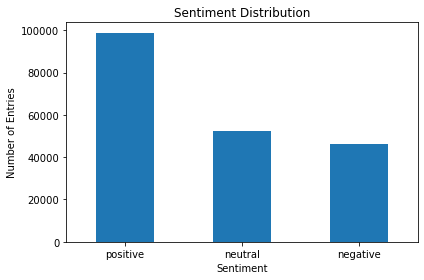

In [19]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Entries")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# Create a summary DataFrame
sentiment_summary = pd.DataFrame({
    'Sentiment': ['positive', 'negative', 'neutral'],
    'Count': [num_positive, num_negative, num_neutral]
})
sentiment_summary

,Sentiment,Count
0,positive,98793
1,negative,46014
2,neutral,52293


#### Key Obvservations
- Positive Sentiments dominate at ~50.4% of the total data
- Negative Sentiments account for only ~23.5% of the total data
- Neutral Sentiments account for only ~26.7% of the total data

This is interesting as I expected negative to dominate the other 2. I believe that the fact that there are many 'general' opinions affect the results.

In [21]:
# DataFrame with general (non-exchange-specific) opinions
general_df = combined_df[combined_df['Exchange'] == 'general']

# DataFrame with exchange-specific opinions
exchange_df = combined_df[combined_df['Exchange'] != 'general']

## Exchange DataFrame Balancing

In [44]:
exchange_df

,Text,Reddit Score,Date,Source,Exchange,Sentiment,Platform,Rating
53,Crypto and stocks are simply crap this week wh...,3,2021-05-13,r/CryptoCurrency,crypto.com,negative,web,None
58,The ones who went through 2017 learned the har...,3,2021-05-09,r/CryptoCurrency,crypto.com,negative,web,None
67,Is there an actual subreddit that discusses cr...,3,2021-05-09,r/CryptoCurrency,crypto.com,positive,web,None
115,"I mean, generally if you bought crypto a year ...",2,2021-05-09,r/CryptoCurrency,crypto.com,positive,web,None
121,"During the height of the GameStop stuff, it wa...",2,2021-05-09,r/CryptoCurrency,crypto.com,negative,web,None
...,...,...,...,...,...,...,...,...
198102,"hello, my bybit account is restricted or banne...",None,2022-10-21,trustpilot,bybit,positive,web,1
198103,I loved my time trading on this website everyt...,None,2022-05-21,trustpilot,bybit,positive,web,5
198104,I've Lost more than 900$ for a long order clos...,None,2022-10-13,trustpilot,bybit,positive,web,1
198105,Scam exchange has scammed me 114$ on p2p and n...,None,2022-10-11,trustpilot,bybit,neutral,web,1


In [45]:
# Count sentiment distribution
sentiment_counts_ex = exchange_df['Sentiment'].value_counts()

# Display basic stats
num_records_ex = len(exchange_df)
num_positive_ex = sentiment_counts_ex.get("positive", 0)
num_negative_ex = sentiment_counts_ex.get("negative", 0)
num_neutral_ex = sentiment_counts_ex.get("neutral", 0)

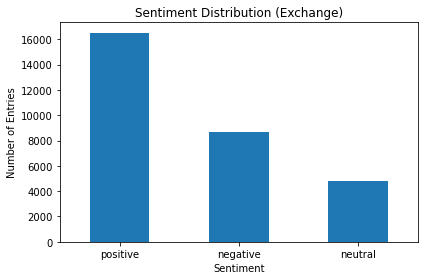

In [46]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
sentiment_counts_ex.plot(kind='bar', title="Sentiment Distribution (Exchange)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Entries")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
# Create a summary DataFrame
sentiment_summary_ex = pd.DataFrame({
    'Sentiment': ['positive', 'negative', 'neutral'],
    'Count': [num_positive_ex, num_negative_ex, num_neutral_ex]
})
sentiment_summary_ex

,Sentiment,Count
0,positive,16515
1,negative,8651
2,neutral,4820


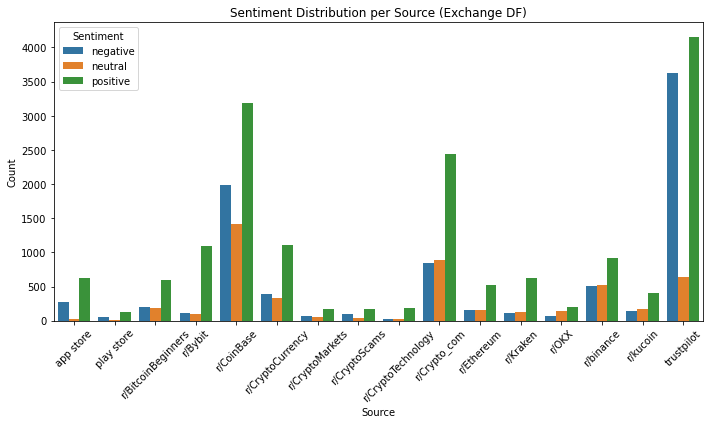

In [48]:
grouped = exchange_df.groupby(['Source', 'Sentiment']).size().reset_index(name='Count')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Source', y='Count', hue='Sentiment')

# Add titles and labels
plt.title('Sentiment Distribution per Source (Exchange DF)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
def balance_sentiment(df, label_col='Sentiment'):
    min_count = df[label_col].value_counts().min()
    balanced_df = df.groupby(label_col).apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_df

In [50]:
sources = exchange_df['Source'].unique()
balanced_list = []

for src in sources:
    source_df = exchange_df[exchange_df['Source'] == src]
    
    # Only balance if all 3 sentiments are present
    if source_df['Sentiment'].nunique() == 3:
        balanced = balance_sentiment(source_df)
        balanced_list.append(balanced)
    else:
        print(f"⚠️ Skipping {src} due to missing sentiment category")

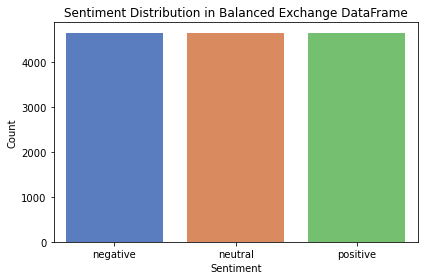

In [51]:
balanced_exchange_df = pd.concat(balanced_list, ignore_index=True)
balanced_sentiment_counts = balanced_exchange_df['Sentiment'].value_counts().reset_index()
balanced_sentiment_counts.columns = ['Sentiment', 'Count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=balanced_sentiment_counts, x='Sentiment', y='Count', palette='muted')
plt.title('Sentiment Distribution in Balanced Exchange DataFrame')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

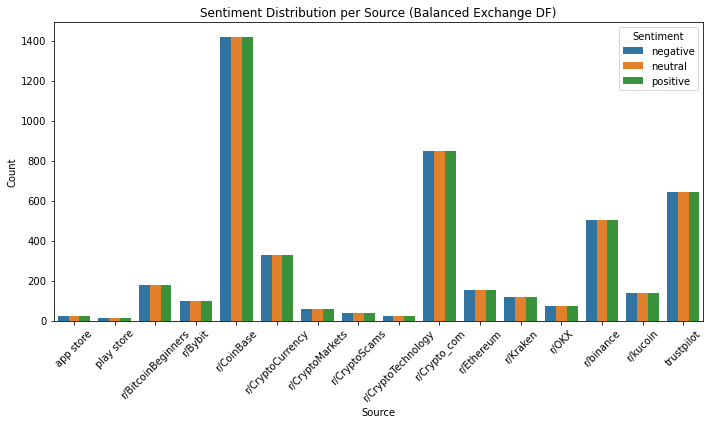

In [52]:
grouped = balanced_exchange_df.groupby(['Source', 'Sentiment']).size().reset_index(name='Count')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Source', y='Count', hue='Sentiment')

# Add titles and labels
plt.title('Sentiment Distribution per Source (Balanced Exchange DF)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## General DataFrame Balancing

In [53]:
general_df

,Text,Reddit Score,Date,Source,Exchange,Sentiment,Platform,Rating
0,You hear about the kid who put in $500 into a ...,53912,2021-05-08,r/CryptoCurrency,general,negative,web,None
1,My buddy (who's a successful business person w...,642,2021-05-09,r/CryptoCurrency,general,positive,web,None
2,You also don’t hear about me turning my $20 in...,17076,2021-05-09,r/CryptoCurrency,general,neutral,web,None
3,Survivorship bias is real and it's everywhere,1472,2021-05-08,r/CryptoCurrency,general,positive,web,None
4,I'm one of those guys who fomo'd in 2017 and e...,678,2021-05-09,r/CryptoCurrency,general,positive,web,None
...,...,...,...,...,...,...,...,...
188567,If anyone wondering why u\\tryM3B1tch called m...,0,2021-11-02,r/Ethereum,general,positive,web,None
188568,Check out Hop Protocol. You can bridge between...,2,2021-11-02,r/Ethereum,general,positive,web,None
188569,"i read through their white paper, and while it...",2,2021-11-02,r/Ethereum,general,positive,web,None
188570,"Lol, you tried to dig up my post history to in...",1,2021-11-02,r/Ethereum,general,positive,web,None


In [54]:
# Count sentiment distribution
sentiment_counts_general = general_df['Sentiment'].value_counts()

# Display basic stats
num_records_general = len(general_df)
num_positive_general = sentiment_counts_general.get("positive", 0)
num_negative_general = sentiment_counts_general.get("negative", 0)
num_neutral_general = sentiment_counts_general.get("neutral", 0)

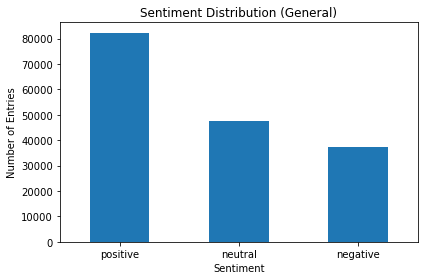

In [55]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
sentiment_counts_general.plot(kind='bar', title="Sentiment Distribution (General)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Entries")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
# Create a summary DataFrame
sentiment_summary_general = pd.DataFrame({
    'Sentiment': ['positive', 'negative', 'neutral'],
    'Count': [num_positive_general, num_negative_general, num_neutral_general]
})
sentiment_summary_general

,Sentiment,Count
0,positive,82278
1,negative,37363
2,neutral,47473


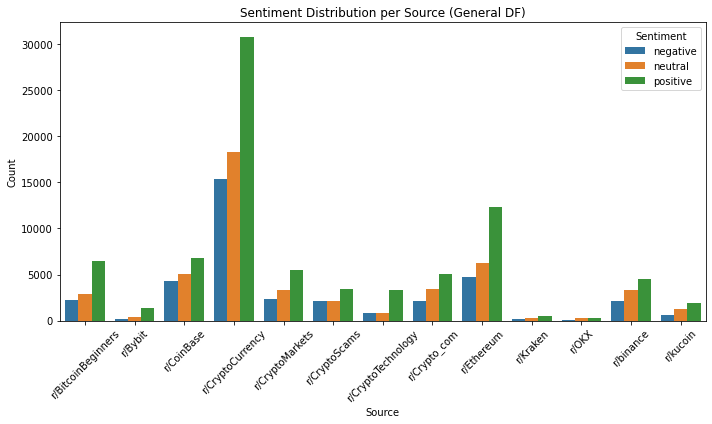

In [57]:
grouped = general_df.groupby(['Source', 'Sentiment']).size().reset_index(name='Count')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Source', y='Count', hue='Sentiment')

# Add titles and labels
plt.title('Sentiment Distribution per Source (General DF)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
sources = general_df['Source'].unique()
balanced_list = []

for src in sources:
    source_df = general_df[general_df['Source'] == src]
    
    # Only balance if all 3 sentiments are present
    if source_df['Sentiment'].nunique() == 3:
        balanced = balance_sentiment(source_df)
        balanced_list.append(balanced)
    else:
        print(f"⚠️ Skipping {src} due to missing sentiment category")

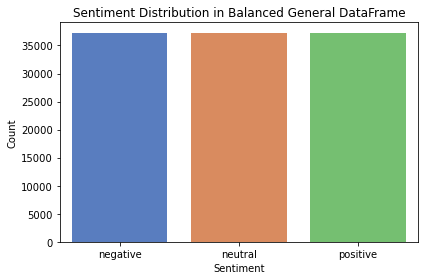

In [59]:
balanced_general_df = pd.concat(balanced_list, ignore_index=True)
balanced_sentiment_counts = balanced_general_df['Sentiment'].value_counts().reset_index()
balanced_sentiment_counts.columns = ['Sentiment', 'Count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=balanced_sentiment_counts, x='Sentiment', y='Count', palette='muted')
plt.title('Sentiment Distribution in Balanced General DataFrame')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

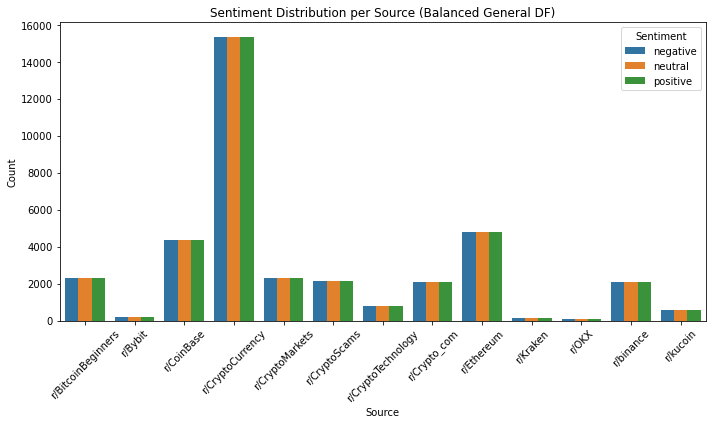

In [60]:
grouped = balanced_general_df.groupby(['Source', 'Sentiment']).size().reset_index(name='Count')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Source', y='Count', hue='Sentiment')

# Add titles and labels
plt.title('Sentiment Distribution per Source (Balanced General DF)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Final Aggregation

In [61]:
final_df = pd.concat([balanced_exchange_df, balanced_general_df], ignore_index=True)
final_df

,Text,Reddit Score,Date,Source,Exchange,Sentiment,Platform,Rating
0,"Binance is a exchange, think of it as a bank o...",2,2021-05-01,r/CryptoCurrency,binance,negative,web,None
1,"Finally, they are doing something about him. T...",-3,2021-02-26,r/CryptoCurrency,crypto.com,negative,web,None
2,"God I hope not. \n\n""Good morning user , you u...",13,2021-05-18,r/CryptoCurrency,crypto.com,negative,web,None
3,I disagree. I think gamers have some of the lo...,3,2021-12-20,r/CryptoCurrency,crypto.com,negative,web,None
4,Or should have given compensation to others wh...,167,2022-08-30,r/CryptoCurrency,crypto.com,negative,web,None
...,...,...,...,...,...,...,...,...
125692,I am not sure what your comment is implying. ...,1,2021-04-24,r/Ethereum,general,positive,web,None
125693,Why would anyone want to do that. What if the ...,1,2021-08-04,r/Ethereum,general,positive,web,None
125694,Especially since Doge has seen prices nearly 1...,6,2021-04-23,r/Ethereum,general,positive,web,None
125695,Someone will fill this gap up so fast,1,2021-08-20,r/Ethereum,general,positive,web,None


In [62]:
# Count sentiment distribution
sentiment_counts = final_df['Sentiment'].value_counts()

# Display basic stats
num_records = len(final_df)
num_positive = sentiment_counts.get("positive", 0)
num_negative = sentiment_counts.get("negative", 0)
num_neutral = sentiment_counts.get("neutral", 0)

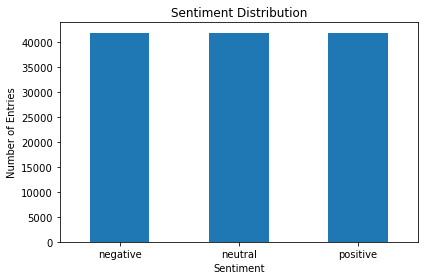

In [63]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Entries")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [64]:
# Create a summary DataFrame
sentiment_summary = pd.DataFrame({
    'Sentiment': ['positive', 'negative', 'neutral'],
    'Count': [num_positive, num_negative, num_neutral]
})
sentiment_summary

,Sentiment,Count
0,positive,41899
1,negative,41899
2,neutral,41899


In [65]:
final_df.to_csv('../data/crypto_exchange_data.csv', index=False)